https://scipy-lectures.org/advanced/advanced_numpy/index.html

# Life of ndarray

In [2]:
import numpy as np

## It’s…

ndarray = block of memory + indexing scheme + data type descriptor

- raw data
- how to locate an element
- how to interpret an element

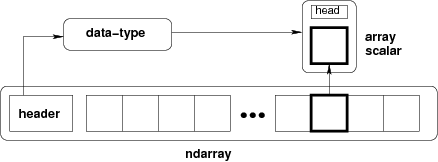

```c
typedef struct PyArrayObject {
        PyObject_HEAD

        /* Block of memory */
        char *data;

        /* Data type descriptor */
        PyArray_Descr *descr;

        /* Indexing scheme */
        int nd;
        npy_intp *dimensions;
        npy_intp *strides;

        /* Other stuff */
        PyObject *base;
        int flags;
        PyObject *weakreflist;
} PyArrayObject;
```

## Block of memory

In [3]:
x = np.array([1, 2, 3], dtype=np.int32)
x.data

In [4]:
bytes(x.data)

b'\x01\x00\x00\x00\x02\x00\x00\x00\x03\x00\x00\x00'

In [6]:
# Memory address of the data:
x.__array_interface__['data'][0] 

140522141333568

In [8]:
x.__array_interface__  

{'data': (140522141333568, False),
 'strides': None,
 'descr': [('', '<i4')],
 'typestr': '<i4',
 'shape': (3,),
 'version': 3}

In [9]:
# Reminder: two ndarrays may share the same memory:
x = np.array([1, 2, 3, 4])
y = x[:-1]
x[0] = 9
y

array([9, 2, 3])

In [14]:
# Memory does not need to be owned by an ndarray:
x = b'1234'      # The 'b' is for "bytes", necessary in Python 3

In [15]:
# x is a string (in Python 3 a bytes), we can represent its data as an array of ints:
y = np.frombuffer(x, dtype=np.int8)
y.data 

In [12]:
y.base is x

True

In [16]:
# The owndata and writeable flags indicate status of the memory block.
y.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

## Data types